# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are: 

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise data and determine the best pre-processing;
- to create the necessary datasets for training and testing purposes;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code runs correctly on the original data file.

Some of the parts of this assignment build on the workflow from the first assignment and that part of the course, and so less detailed instructions are provided for this, as you should be able to implement this workflow now without low-level guidance. A substantial portion of the marks for this assignment are associated with making the right choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and certain restrictions on sklearn functions will be made clear in the instruction text. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. This makes their method much faster than existing ones, but it is also slightly noisier. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 1) have at least a 95% probability of detecting malignant cancer when it is present;
 2) have no more than 1 in 10 healthy cases (those with benign tumours) labelled as positive (malignant).
 
They have hand-labelled 300 samples for you, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail, as appropriate to the marks given.

## 1. Investigate Dataset (10% = 3 marks)

In [1]:
# This code imports some libraries that you will need. 
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

### 1.1 Load the dataset [0.5 marks]
Do this from the csv file, `assignment2.csv`, as done in assignment 1 and workshops 2 and 3. Extract the feature names and label names for use later on.  Note that we will be treating the _malignant_ case as our _positive_ case, as this is the standard convention in medicine.

**Print out some information (in text) about the data, to verify that the loading has worked and to get a feeling for what is present in the dataset and the range of the values.**

**Also, graphically show the proportions of the labels in the whole dataset.**

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('assignment2.csv')

df.head()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,15.494654,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,19.522957,22.427276,135.128520,1286.903131,0.142725,0.407483,0.445992,0.171662,0.353211,0.097731
1,malignant,16.229871,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,19.140235,24.905156,123.886045,1234.499997,0.129135,0.223918,0.248846,0.136735,0.284427,0.085758
2,malignant,16.345671,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,19.144816,25.601433,125.113036,1202.749973,0.135017,0.314402,0.332505,0.161497,0.313038,0.084340
3,malignant,13.001009,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,15.565911,26.145119,102.958265,737.655082,0.161390,0.485912,0.430007,0.167254,0.432297,0.117705
4,malignant,16.416060,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,18.620376,22.306233,124.002529,1139.490971,0.133950,0.230996,0.316620,0.131715,0.269591,0.080497


In [3]:
# Extract feature names
feature_names = df.columns[:-1]

# Extract label name
label_name = df.columns[0]

print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {len(feature_names)}")
print(f"Feature names: {feature_names}")
print(f"Label name: {label_name}")
# Checking the distribution of the target classes
df['label'].value_counts()


Number of samples: 300
Number of features: 30
Feature names: Index(['label', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')
Label name: label


label
benign       154
malignant    146
Name: count, dtype: int64

In [4]:
# Print some information about the data
data_info = df.describe(include='all')
data_info.transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
label,300,2,benign,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean radius,300.0,NaN,NaN,NaN,14.231808,1.297393,11.560025,13.356676,13.976933,15.103078,19.090091
mean texture,300.0,NaN,NaN,NaN,19.312619,1.572224,15.34927,18.194791,19.220652,20.24566,26.836291
mean perimeter,300.0,NaN,NaN,NaN,92.727687,8.949937,74.690886,86.659535,90.896982,99.093762,126.16803
mean area,300.0,NaN,NaN,NaN,664.367372,129.515717,477.371592,580.383274,628.004851,737.444716,1300.788708
mean smoothness,300.0,NaN,NaN,NaN,0.096937,0.005067,0.084651,0.093305,0.096722,0.099995,0.1145
mean compactness,300.0,NaN,NaN,NaN,0.106615,0.020819,0.075184,0.091105,0.102401,0.117334,0.19288
mean concavity,300.0,NaN,NaN,NaN,0.092591,0.030312,0.050771,0.069071,0.084829,0.107994,0.212704
mean concave points,300.0,NaN,NaN,NaN,0.05082,0.01435,0.028701,0.039507,0.046744,0.060606,0.105212
mean symmetry,300.0,NaN,NaN,NaN,0.182546,0.010754,0.157059,0.175353,0.181685,0.187789,0.226448


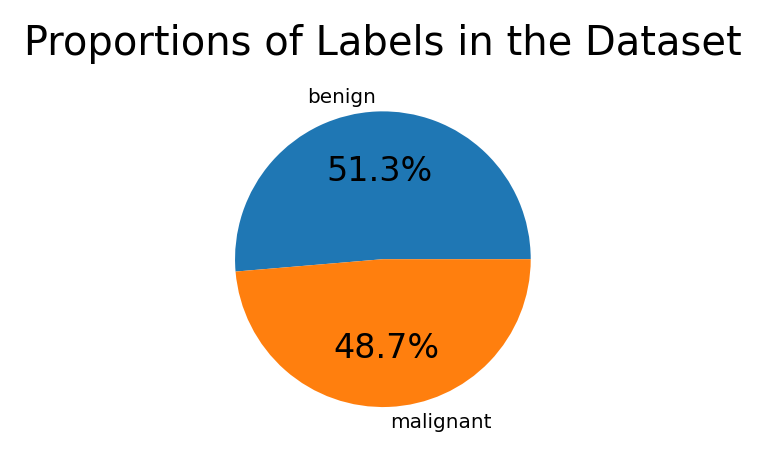

In [5]:
# Plot the proportions of the labels
plt.figure(figsize=(2, 2))
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Proportions of Labels in the Dataset")
plt.ylabel('')
plt.show()

### 1.2 Visualise the dataset [1.5 marks]

As this data is well curated by the client already, you do not need to worry about outliers, missing values or imputation in this case, but be aware that this is the exception, not the rule.

To familiarise yourself with the nature and information contained in the data, display histograms for the data according to the following instructions:
 - **display histograms** for each feature in the _mean_ group, but on _each_ histogram **have the two classes displayed together in one plot** (see example plot below and a code fragment to help you) - and note that your plot does not need to look exactly the example here;
 - **repeat this** for the _standard error_ and _worst_ groups;
 - make sure that in all cases you clearly label the plots and the classes in histograms.

<center><img src="Example_Hist_Plot.png" width="300" alt="Example plot of histogram"></center>

In [6]:
# Code fragment to help with plotting histograms combining matplotlib and seaborn (and pandas)
#fig, axes = plt.subplots(Nrows, Ncols, figsize=(?, ?))
#...
#sns.histplot(data=df, x=??, hue="??", bins=??, kde=True, ax=axes[row,col], edgecolor=None)

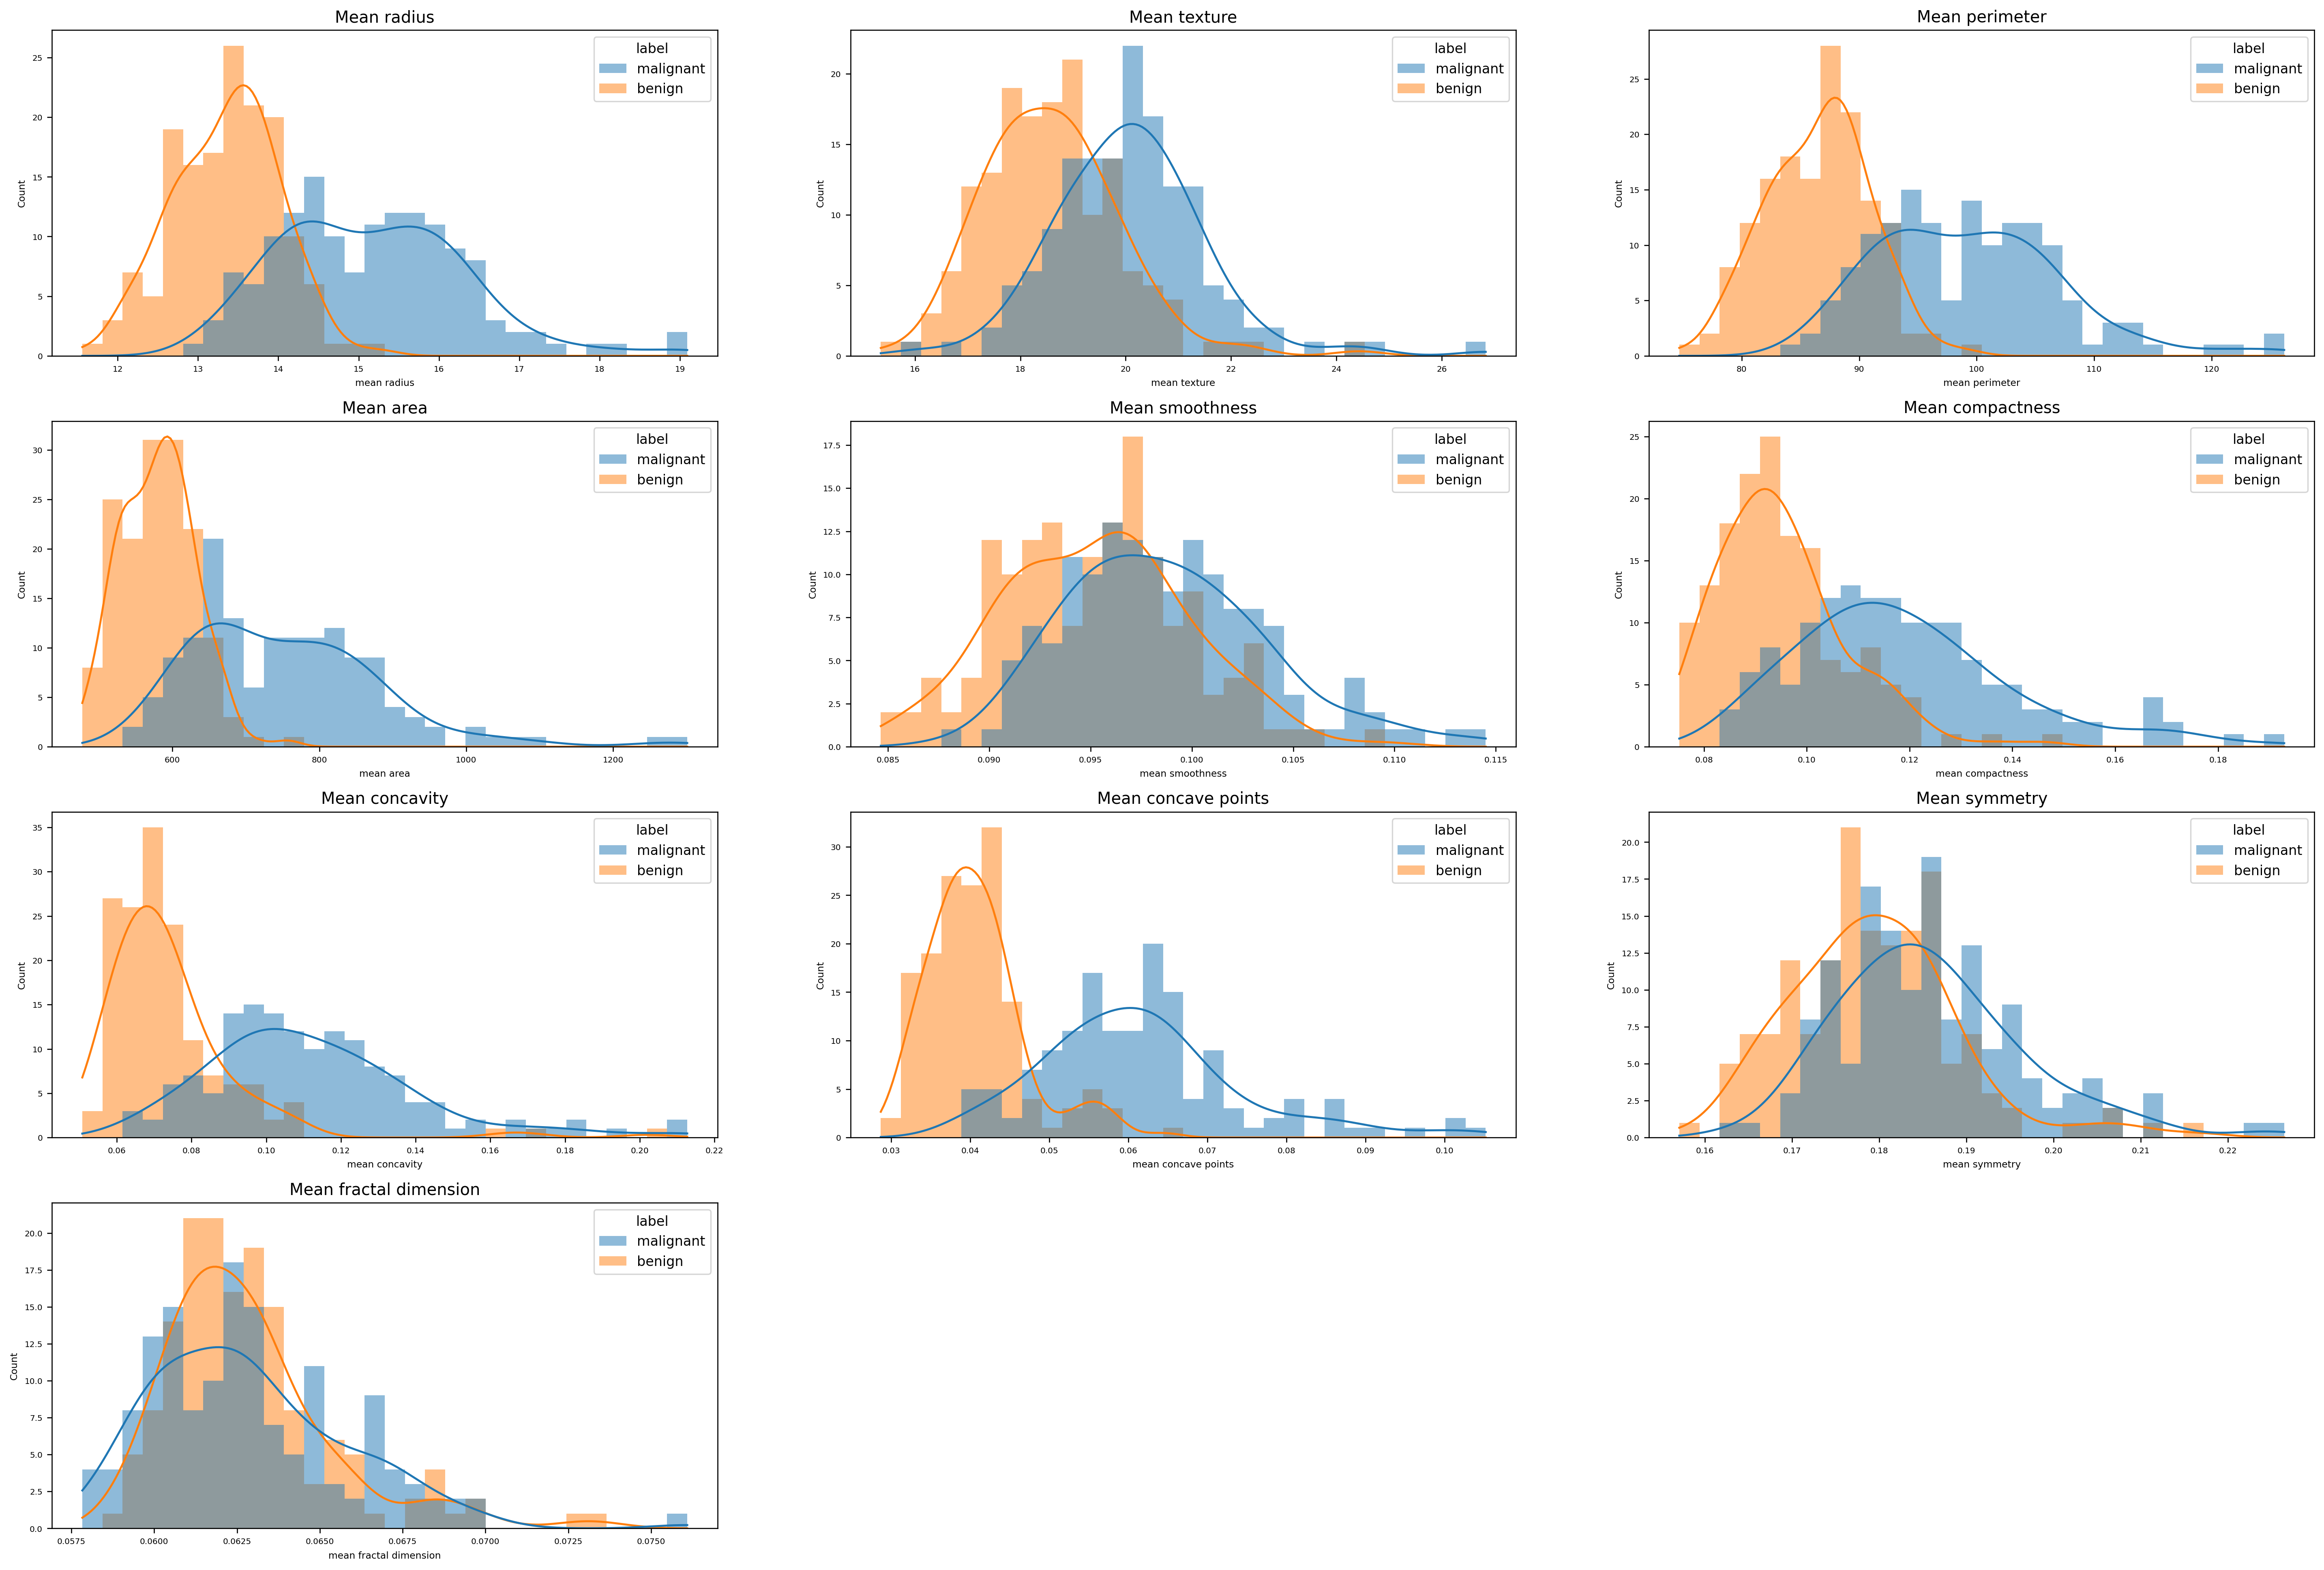

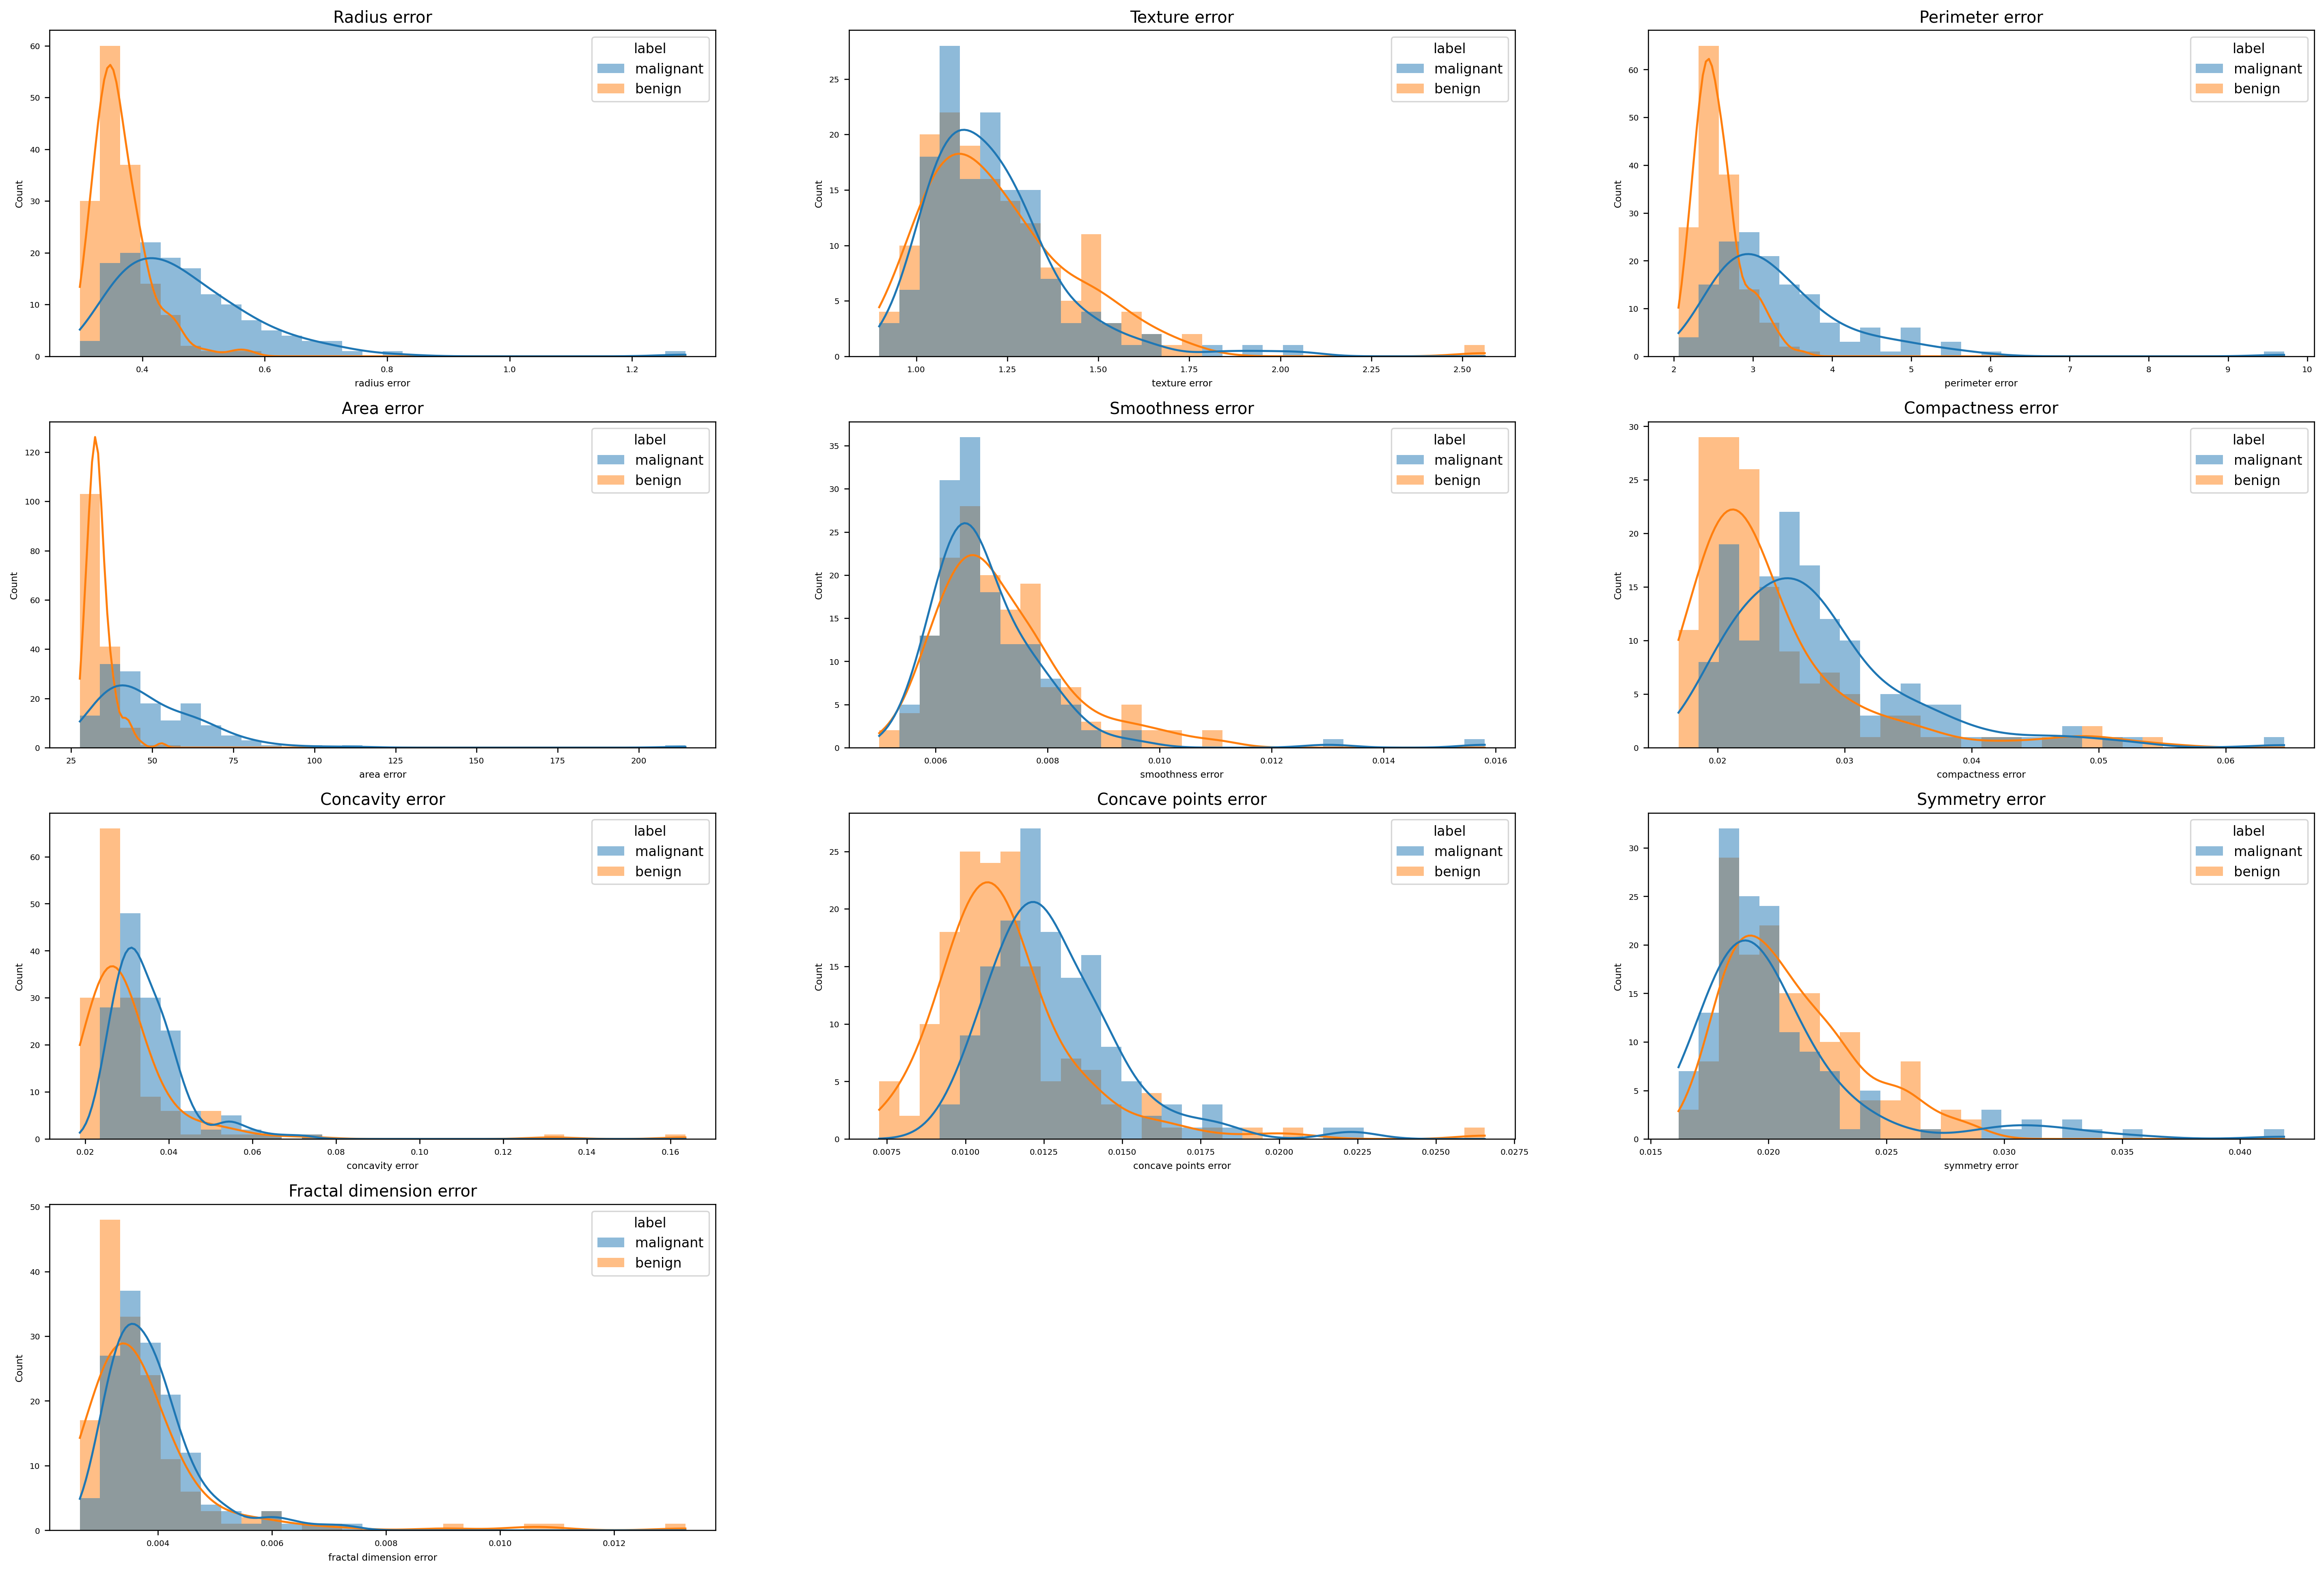

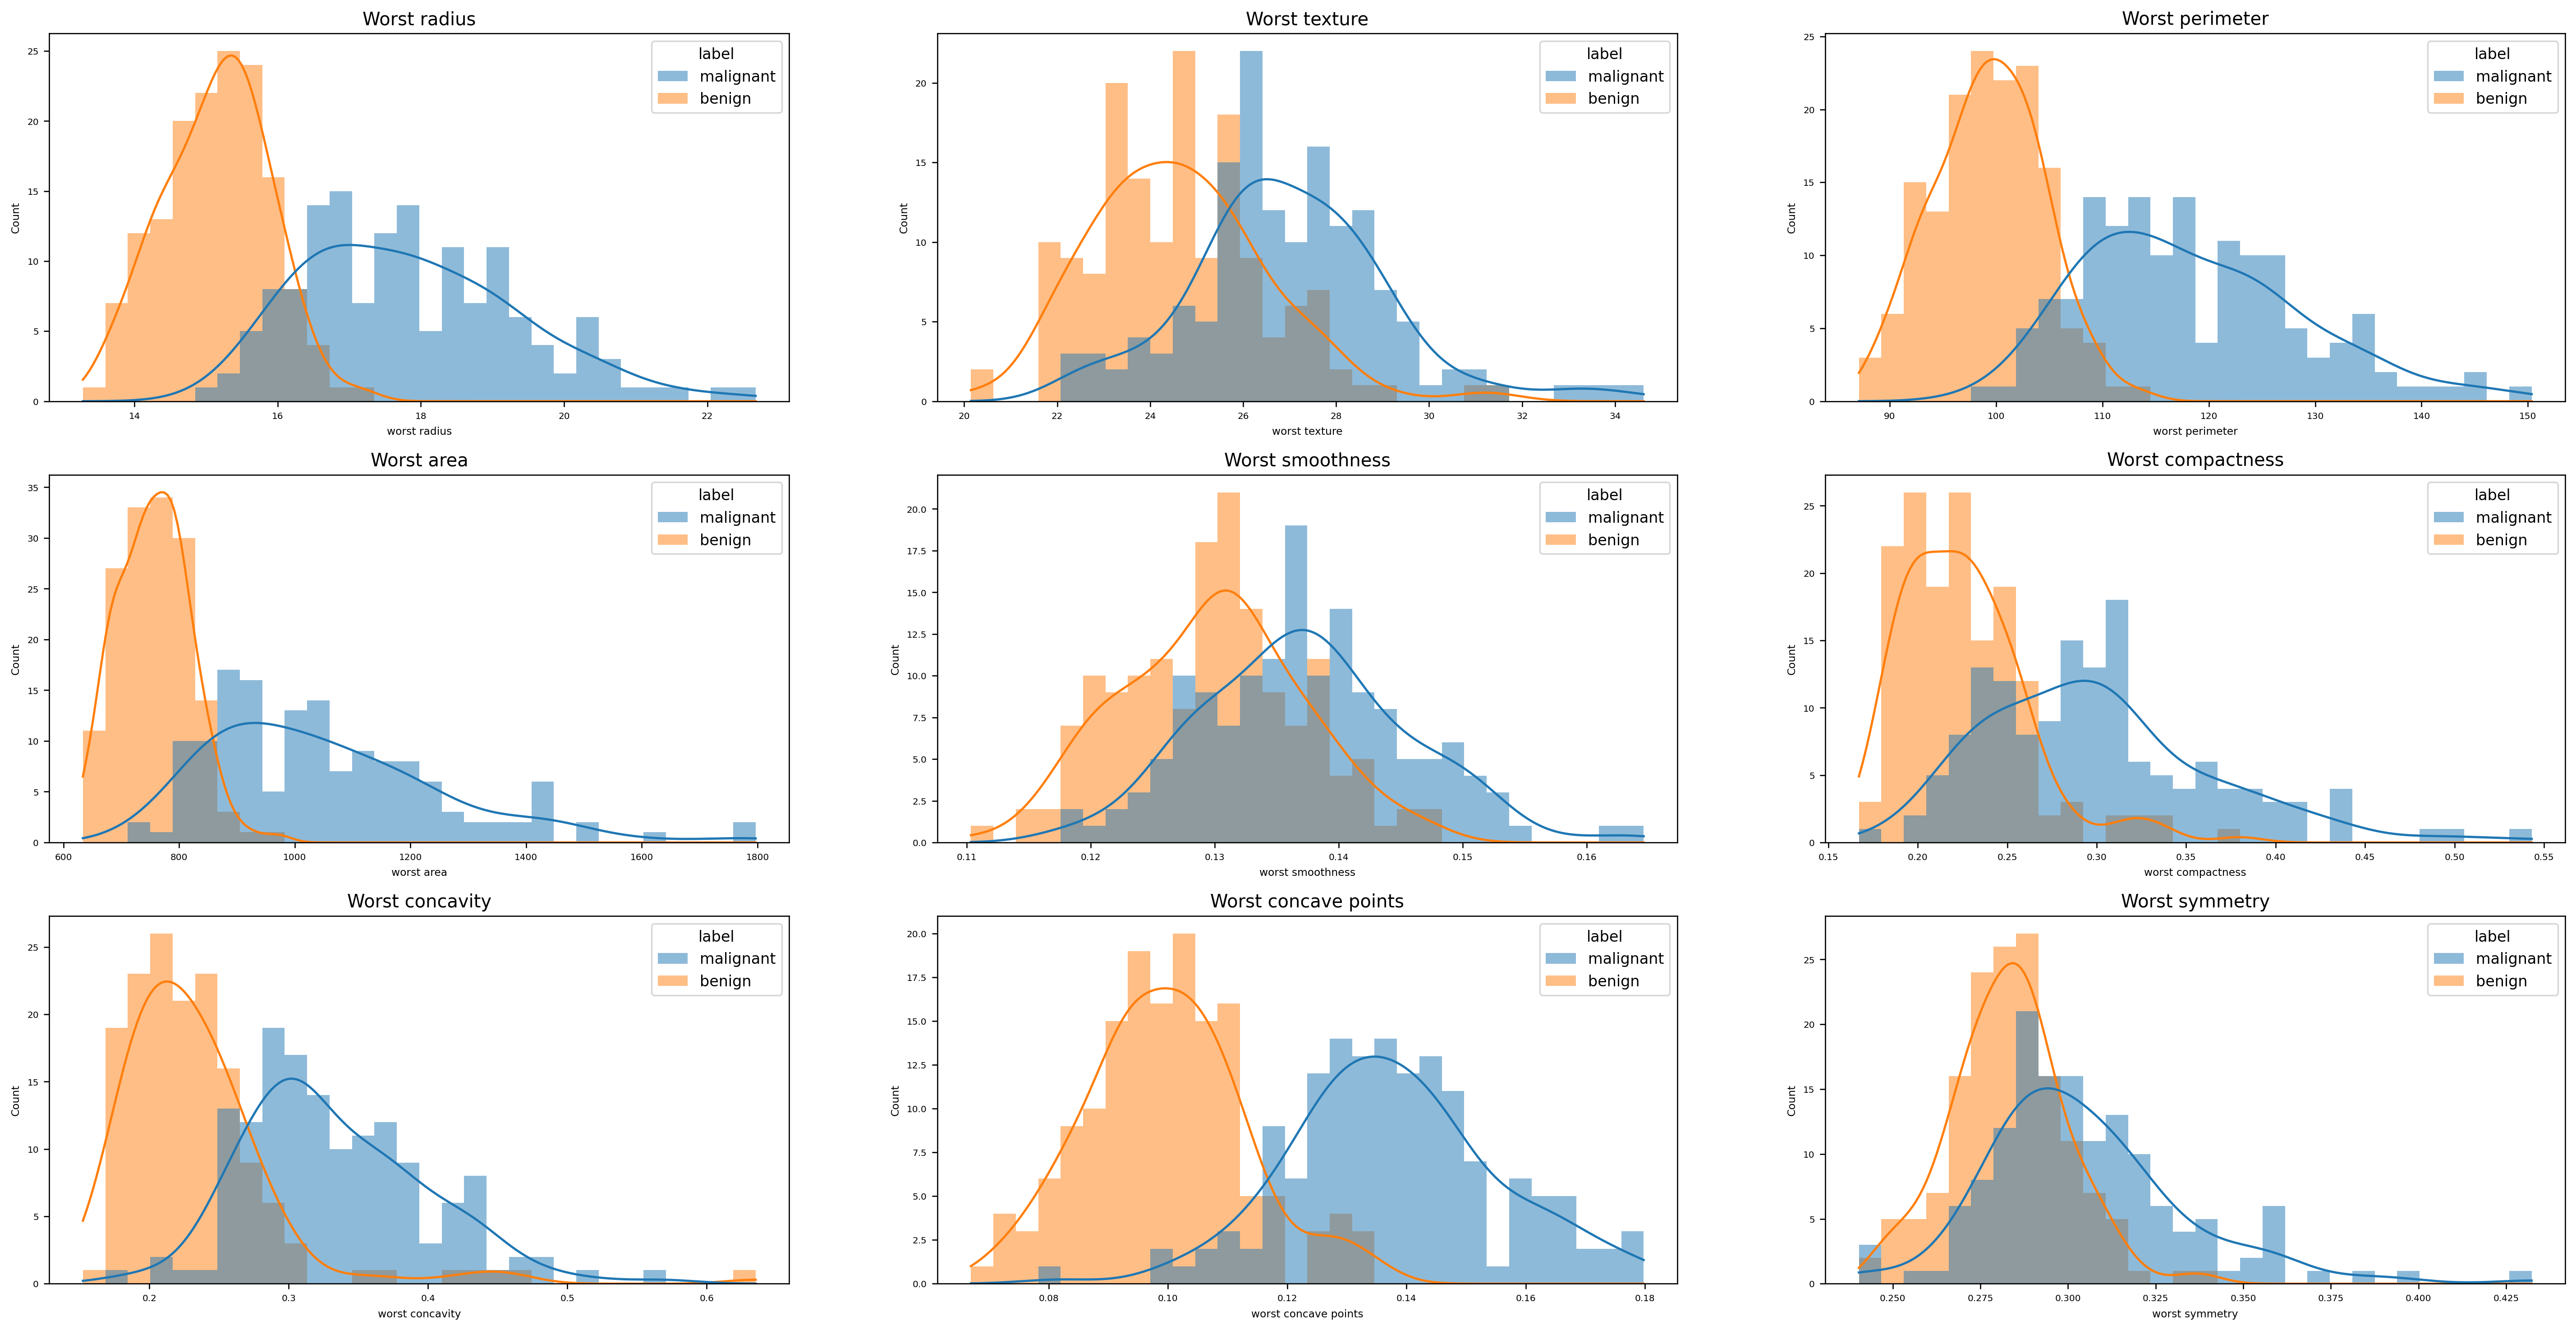

In [7]:
# Split the feature names into groups
mean_features = [feature for feature in feature_names if 'mean' in feature]
se_features = [feature for feature in feature_names if 'error' in feature]
worst_features = [feature for feature in feature_names if 'worst' in feature]

def plot_histograms_grid(df, features, group_name, Ncols):
    Nrows = -(-len(features) // Ncols)  # Ceiling division
    fig, axes = plt.subplots(Nrows, Ncols, figsize=(10*Ncols, 5*Nrows))
    axes = axes.ravel()  # Flatten the axes array
    for idx in range(Nrows * Ncols):
        if idx < len(features):
            sns.histplot(data=df, x=features[idx], hue=label_name, bins=30, kde=True, ax=axes[idx], edgecolor=None)
            axes[idx].set_title(f'{features[idx].capitalize()}')
        else:
            fig.delaxes(axes[idx])  

Ncols = 3

# Plot histograms for each group of features
plot_histograms_grid(df, mean_features, 'Mean', Ncols)
plot_histograms_grid(df, se_features, 'Standard Error', Ncols)
plot_histograms_grid(df, worst_features, 'Worst', Ncols)

### 1.3 Ranking the features [0.5 marks]

**Based on the histograms, which do you think are the 3 strongest features for discriminating between the classes?**

In [8]:
# Based on the visual inspection of the histograms, I think that the following 3 features are the storngest for discriminating between the classes:
# - worst concave points
# - worst area
# - mean concave points

# The malignant class tends to have higher mean values in these and there's less overlap between classes.

### 1.4 Splitting the dataset [0.5 marks]

Split the dataset into appropriate subsets. You must choose what the subsets are and how big they are. However, we want to make sure the proportion of the two classes is consistent across all datasets, so use the _stratify_ option, as used in workshops 5 and 6. Verify the size and label distribution in each dataset.

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42, stratify=df['label'])

# Check the size of the training and testing datasets
print("Size of the training dataset: ", df_train.shape[0])
print("Size of the testing dataset: ", df_test.shape[0])

# Check the label distribution in the training dataset
print("\nLabel distribution in the training dataset:\n", df_train['label'].value_counts(normalize=True))

# Check the label distribution in the testing dataset
print("\nLabel distribution in the testing dataset:\n", df_test['label'].value_counts(normalize=True))


Size of the training dataset:  225
Size of the testing dataset:  75

Label distribution in the training dataset:
 label
benign       0.511111
malignant    0.488889
Name: proportion, dtype: float64

Label distribution in the testing dataset:
 label
benign       0.52
malignant    0.48
Name: proportion, dtype: float64


## 2. Build, Train and Optimise Classifiers (60% = 18 marks)

### 2.1 Pipeline [0.5 marks]
**Build a pre-processing pipeline** that includes imputation (as even though we don't strictly need it here it is a good habit to always include it) and other appropriate pre-processing.  

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the labels
le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train['label'])
df_test['label'] = le.transform(df_test['label'])

# Define the pre-processing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation
    ('scaler', StandardScaler()),  # Standardization
])

# Apply the pipeline to the feature data
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


### 2.2 Baseline measurements [1.5 marks]

For our classification task we will consider **three simple baseline cases**:
1) predicting all samples to be negative (class 1)
2) predicting all samples to be positive (class 2)
3) making a random prediction for each sample with equal probability for each class

**For each case measure and display the following metrics:**
 - balanced accuracy
 - recall
 - precision
 - auc
 - f1score
 - fbeta_score with beta=0.1
 - fbeta_score with beta=10

Code is given below for the latter metrics (all metrics are discussed in lecture 4 and many are in workshop 4).

Also **calculate and display the confusion matrix** for each baseline case, using a heatmap and numbers (as in workshop 4). 

In [11]:
from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

All Negative Predictions:
Balanced Accuracy: 0.5
Recall: 0.0
Precision: 0.0
AUC: 0.5
F1 Score: 0.0
F-beta Score (beta=0.1): 0.0
F-beta Score (beta=10): 0.0


/Users/a1879231/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


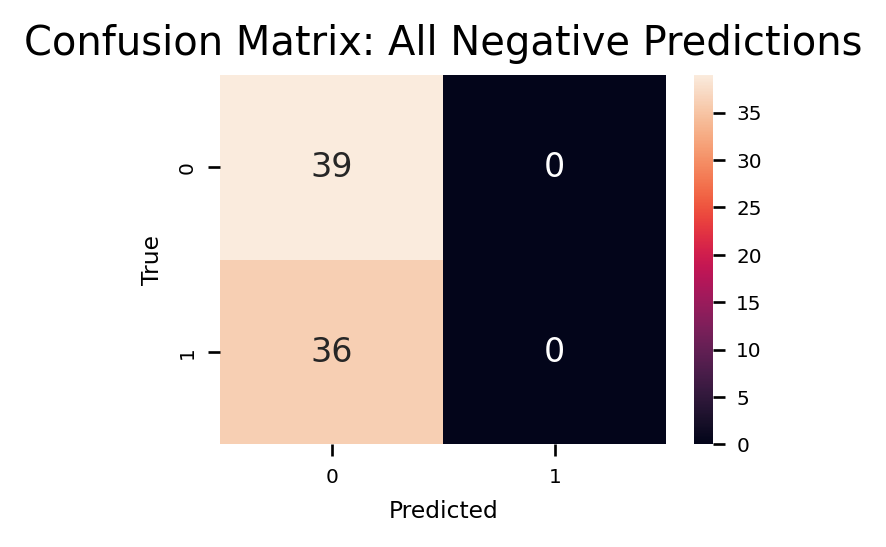

All Positive Predictions:
Balanced Accuracy: 0.5
Recall: 1.0
Precision: 0.48
AUC: 0.5
F1 Score: 0.6486486486486487
F-beta Score (beta=0.1): 0.4824840764331211
F-beta Score (beta=10): 0.9893877551020408


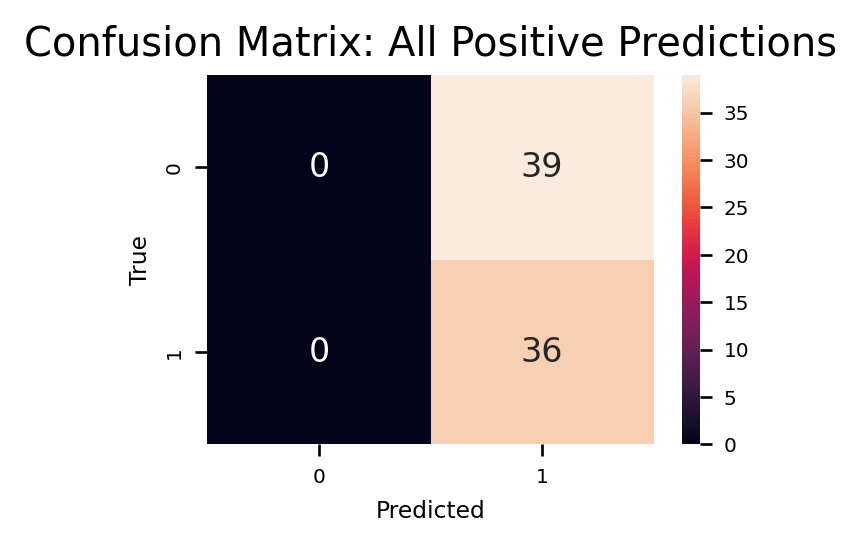

Random Predictions:
Balanced Accuracy: 0.4935897435897436
Recall: 0.5
Precision: 0.47368421052631576
AUC: 0.4935897435897436
F1 Score: 0.4864864864864865
F-beta Score (beta=0.1): 0.47393117831074033
F-beta Score (beta=10): 0.4997251236943375


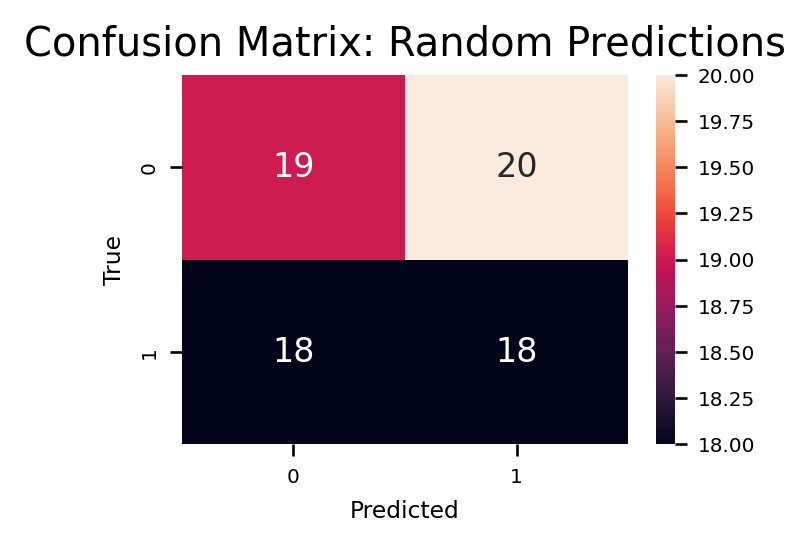

In [12]:
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to calculate metrics and plot confusion matrix
def calculate_metrics_and_plot_cm(y_true, y_pred, title):
    # Calculate metrics
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)
    fbeta_01 = fbeta_score(y_true, y_pred, beta=0.1)
    fbeta_10 = fbeta_score(y_true, y_pred, beta=10)
    
    # Print metrics
    print(f"{title}:")
    print(f"Balanced Accuracy: {balanced_accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"AUC: {auc}")
    print(f"F1 Score: {f1score}")
    print(f"F-beta Score (beta=0.1): {fbeta_01}")
    print(f"F-beta Score (beta=10): {fbeta_10}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(3,2))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Predict all samples to be negative
y_pred_all_negative = np.zeros(y_test.shape)

# Predict all samples to be positive
y_pred_all_positive = np.ones(y_test.shape)

# Make a random prediction for each sample with equal probability for each class
np.random.seed(42)
y_pred_random = np.random.choice([0, 1], size=y_test.shape)

# Calculate metrics and plot confusion matrix for each case
calculate_metrics_and_plot_cm(y_test, y_pred_all_negative, "All Negative Predictions")
calculate_metrics_and_plot_cm(y_test, y_pred_all_positive, "All Positive Predictions")
calculate_metrics_and_plot_cm(y_test, y_pred_random, "Random Predictions")


### 2.3 Choose a performance metric [0.5 marks]

Based on the above baseline tests and the client's requirements, **choose a performance metric** to use for evaluating/driving your machine learning methods.  **Give a reason for your choice.**

In [13]:
# Both F1 score and AUC are good metrics for this problem. 
# F1 score takes into account both precision and recall, which are both important in this problem. 
# AUC is a good measure of how well the model is able to distinguish between the two classes.

### 2.4 SGD baseline [1 mark]

For a stronger baseline, **train and evaluate** the Stochastic Gradient Descent classifier (as seen in workshop 5). For this baseline case use the default settings for all the hyperparameters.

SGD Predictions:
Balanced Accuracy: 0.9358974358974359
Recall: 1.0
Precision: 0.8780487804878049
AUC: 0.9358974358974359
F1 Score: 0.9350649350649352
F-beta Score (beta=0.1): 0.879110251450677
F-beta Score (beta=10): 0.9986267508926119


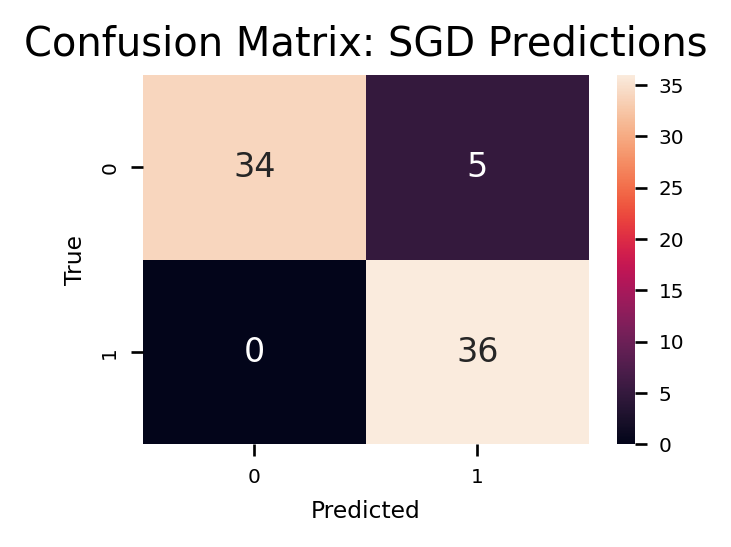

In [14]:
from sklearn.linear_model import SGDClassifier

# Create an SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier
sgd_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_sgd = sgd_clf.predict(X_test)

# Calculate metrics and plot confusion matrix
calculate_metrics_and_plot_cm(y_test, y_pred_sgd, "SGD Predictions")

### 2.5 Confusion matrix [1 mark]

Calculate and display the normalized version of the confusion matrix.  From this **calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.  Which of the client's two criteria does this relate to, and is this baseline satisfying this criterion or not?**

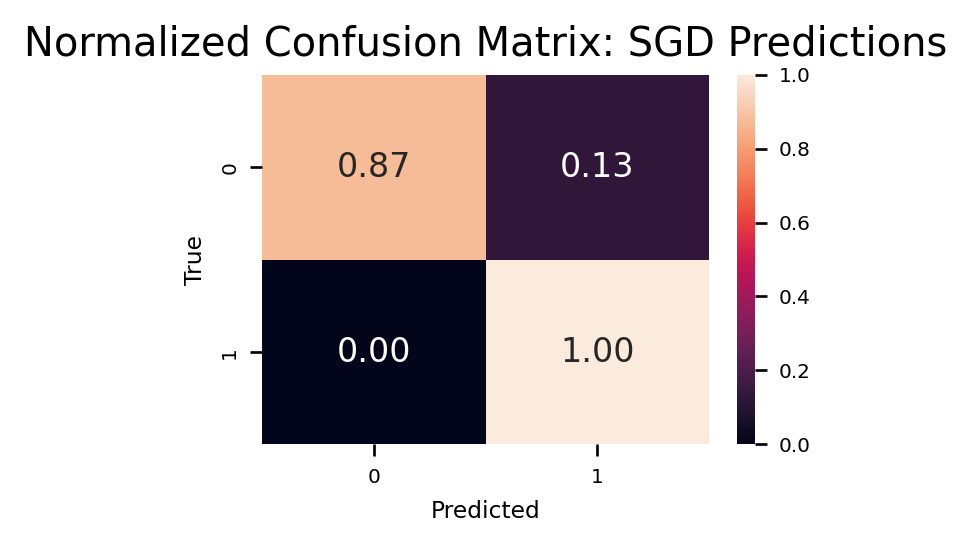

0.0

In [15]:
# Calculate the normalized confusion matrix
cm_normalized = confusion_matrix(y_test, y_pred_sgd, normalize='true')

# Plot the normalized confusion matrix
plt.figure(figsize=(3,2))
sns.heatmap(cm_normalized, annot=True, fmt='.2f')
plt.title("Normalized Confusion Matrix: SGD Predictions")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Calculate the probability that a sample from a person with a malignant tumour is given a result that they do not have cancer
prob_malignant_no_cancer = cm_normalized[1, 0]

prob_malignant_no_cancer

In [16]:
# The probability that a sample from a person with a malignant tumour is given a result that they do not have cancer is 0.0.
# This relates the first criterion and satisfies it.

### 2.6 Main classifier [11 marks]

**Train and optimise the hyperparameters** to give the best performance for **each of the following classifiers**:
 - KNN (K-Nearest Neighbour) classifier
 - Decision tree classifier
 - Support vector machine classifier
 - SGD classifier
 
Follow best practice as much as possible here. You must make all the choices and decisions yourself, and strike a balance between computation time and performance.

You can use any of the sci-kit learn functions in sklearn.model_selection.cross* and anything used in workshops 3, 4, 5 and 6. Other hyper-parameter optimisation functions apart from these cannot be used (even if they are good and can be part of best practice in other situations - for this assignment everyone should assume they only have very limited computation resources and limit themselves to these functions).

**Display the performance of the different classifiers and the optimised hyperparameters.**

**Based on these results, list the best 3 classifiers and indicate if you think any perform equivalently.**

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Define the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='balanced_accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

best_params, best_score

({'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'},
 0.9642292490118578)

KNN Predictions:
Balanced Accuracy: 0.9732905982905983
Recall: 0.9722222222222222
Precision: 0.9722222222222222
AUC: 0.9732905982905984
F1 Score: 0.9722222222222222
F-beta Score (beta=0.1): 0.9722222222222222
F-beta Score (beta=10): 0.9722222222222222


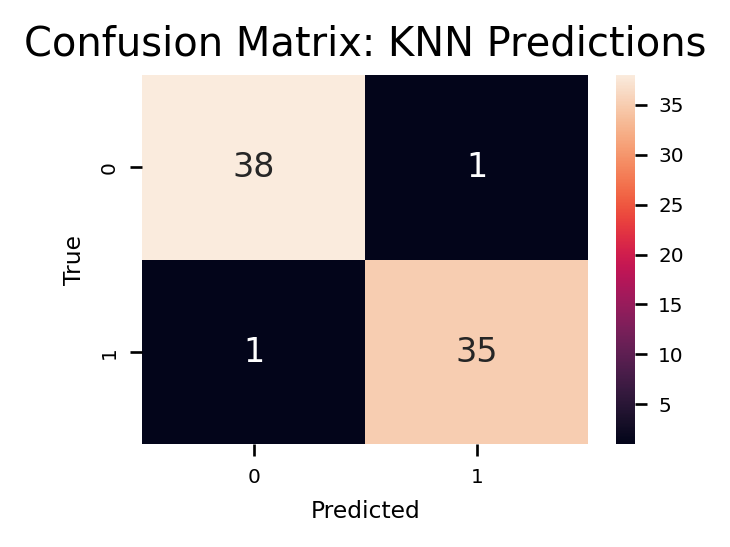

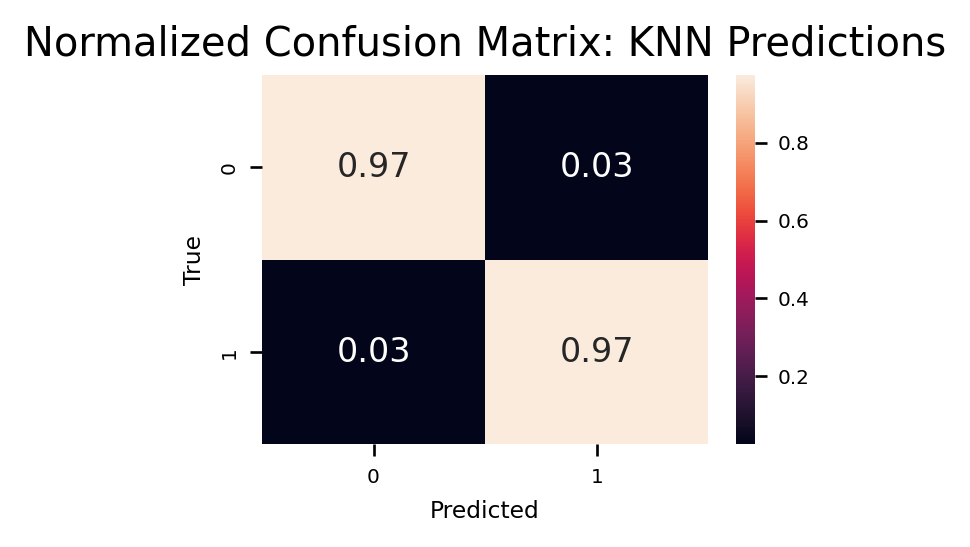

0.02564102564102564

In [36]:
# Use the best estimator from GridSearchCV to make predictions on the test set
y_pred_knn = grid_search.best_estimator_.predict(X_test)

# Calculate metrics and plot confusion matrix
calculate_metrics_and_plot_cm(y_test, y_pred_knn, "KNN Predictions")

# Calculate the normalized confusion matrix for the KNN classifier
cm_normalized_knn = confusion_matrix(y_test, y_pred_knn, normalize='true')
plt.figure(figsize=(3,2))
sns.heatmap(cm_normalized_knn, annot=True, fmt='.2f')
plt.title("Normalized Confusion Matrix: KNN Predictions")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Calculate the probability that a healthy person (one with a benign tumor) is incorrectly labeled as having malignant cancer
prob_benign_malignant_knn = cm_normalized_knn[0, 1]

prob_benign_malignant_knn

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy']
}

# Define the GridSearchCV object
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='balanced_accuracy')

# Fit the GridSearchCV object to the data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_

# Get the best score
best_score_dt = grid_search_dt.best_score_

best_params_dt, best_score_dt


({'criterion': 'gini'}, 0.9027667984189722)

Decision Tree Predictions:
Balanced Accuracy: 0.9465811965811965
Recall: 0.9444444444444444
Precision: 0.9444444444444444
AUC: 0.9465811965811965
F1 Score: 0.9444444444444444
F-beta Score (beta=0.1): 0.9444444444444444
F-beta Score (beta=10): 0.9444444444444445


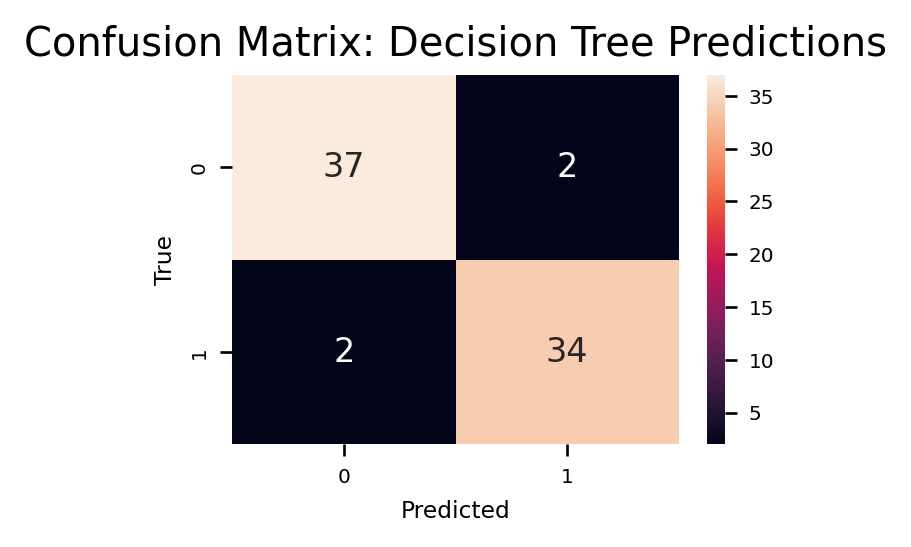

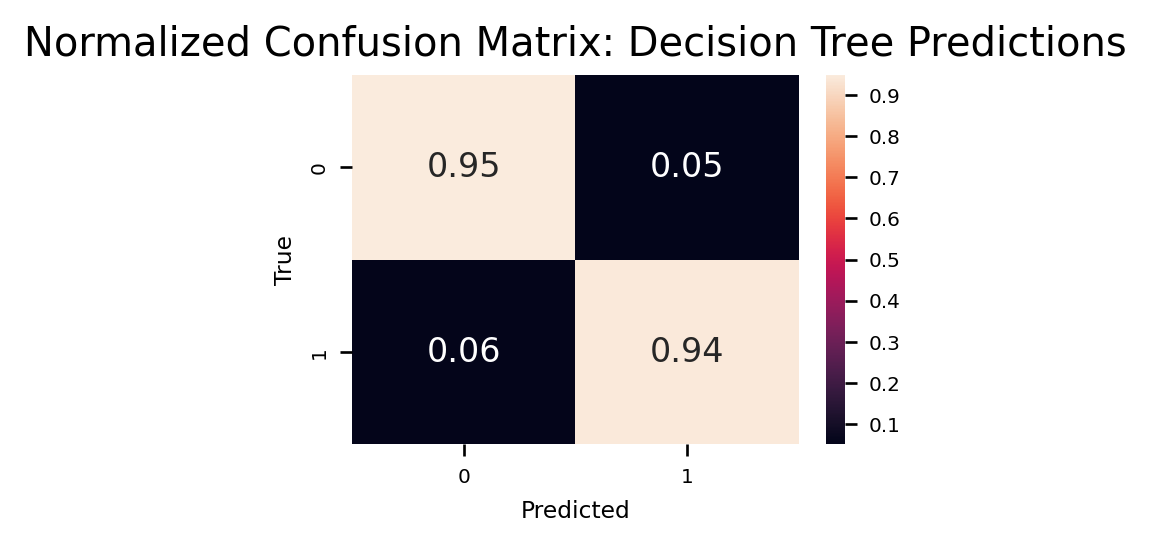

0.05128205128205128

In [35]:
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

# Calculate metrics and plot confusion matrix
calculate_metrics_and_plot_cm(y_test, y_pred_dt, "Decision Tree Predictions")

# Calculate the normalized confusion matrix for the Decision Tree classifier
cm_normalized_dt = confusion_matrix(y_test, y_pred_dt, normalize='true')

# Plot the normalized confusion matrix for the Decision Tree classifier
plt.figure(figsize=(3,2))
sns.heatmap(cm_normalized_dt, annot=True, fmt='.2f')
plt.title("Normalized Confusion Matrix: Decision Tree Predictions")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Calculate the probability that a healthy person (one with a benign tumor) is incorrectly labeled as having malignant cancer
prob_benign_malignant_dt = cm_normalized_dt[0, 1]

prob_benign_malignant_dt

In [21]:
from sklearn.svm import SVC

# Define the model
svm = SVC(random_state=42)

# Define the parameter grid
param_grid_svm_simplified = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf']
}

# Define the GridSearchCV object
grid_search_svm = GridSearchCV(svm, param_grid_svm_simplified, cv=5, scoring='balanced_accuracy')

# Fit the GridSearchCV object to the data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters
best_params_svm = grid_search_svm.best_params_

# Get the best score
best_score_svm = grid_search_svm.best_score_

best_params_svm, best_score_svm


({'C': 1, 'kernel': 'rbf'}, 0.9600790513833992)

SVM Predictions:
Balanced Accuracy: 0.9871794871794872
Recall: 1.0
Precision: 0.972972972972973
AUC: 0.9871794871794871
F1 Score: 0.9863013698630138
F-beta Score (beta=0.1): 0.9732334047109209
F-beta Score (beta=10): 0.9997250481165796


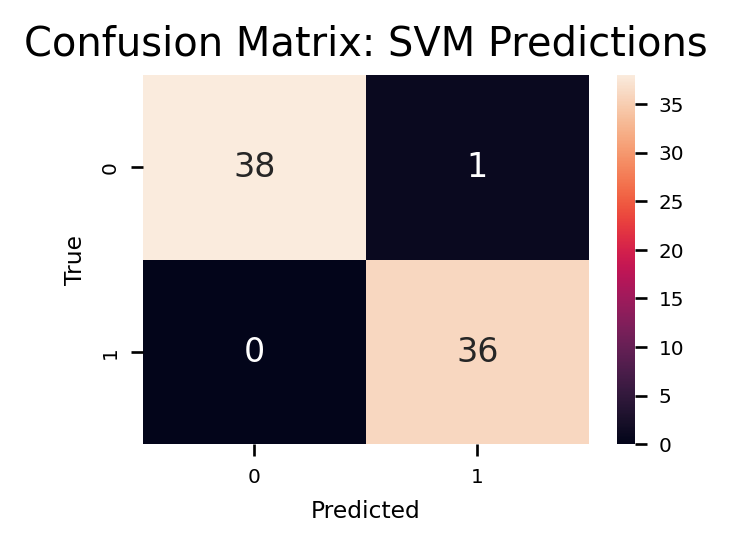

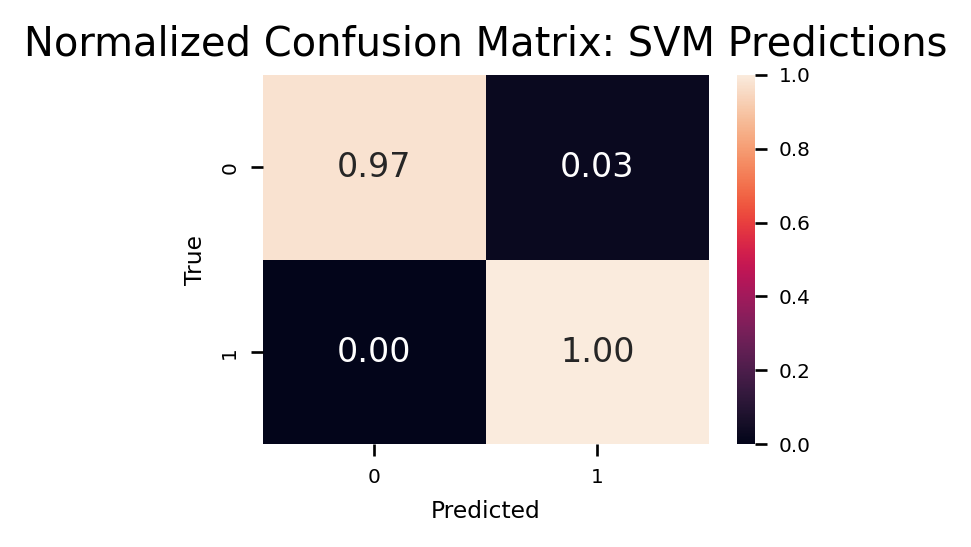

0.02564102564102564

In [37]:
# Use the best estimator from GridSearchCV to make predictions on the test set
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)

# Calculate the normalized confusion matrix for the SVM classifier
cm_normalized_svm = confusion_matrix(y_test, y_pred_svm, normalize='true')

# Calculate metrics and plot confusion matrix
calculate_metrics_and_plot_cm(y_test, y_pred_svm, "SVM Predictions")

# Plot the normalized confusion matrix for the SVM classifier
plt.figure(figsize=(3,2))
sns.heatmap(cm_normalized_svm, annot=True, fmt='.2f')
plt.title("Normalized Confusion Matrix: SVM Predictions")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Calculate the probability that a healthy person (one with a benign tumor) is incorrectly labeled as having malignant cancer
prob_benign_malignant_svm = cm_normalized_svm[0, 1]

prob_benign_malignant_svm

In [23]:
# Define the model
sgd = SGDClassifier(random_state=42)

# Define the parameter grid
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'learning_rate': ['constant', 'optimal'],
    'eta0': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet']
}

# Define the GridSearchCV object
grid_search_sgd = GridSearchCV(sgd, param_grid_sgd, cv=5, scoring='balanced_accuracy')

# Fit the GridSearchCV object to the data
grid_search_sgd.fit(X_train, y_train)

# Get the best parameters
best_params_sgd = grid_search_sgd.best_params_

# Get the best score
best_score_sgd = grid_search_sgd.best_score_

best_params_sgd, best_score_sgd


({'alpha': 1, 'eta0': 0.0001, 'learning_rate': 'optimal', 'penalty': 'l2'},
 0.9553359683794467)

Optimized SGD Predictions:
Balanced Accuracy: 0.9444444444444444
Recall: 0.8888888888888888
Precision: 1.0
AUC: 0.9444444444444444
F1 Score: 0.9411764705882353
F-beta Score (beta=0.1): 0.9987639060568604
F-beta Score (beta=10): 0.8898678414096916


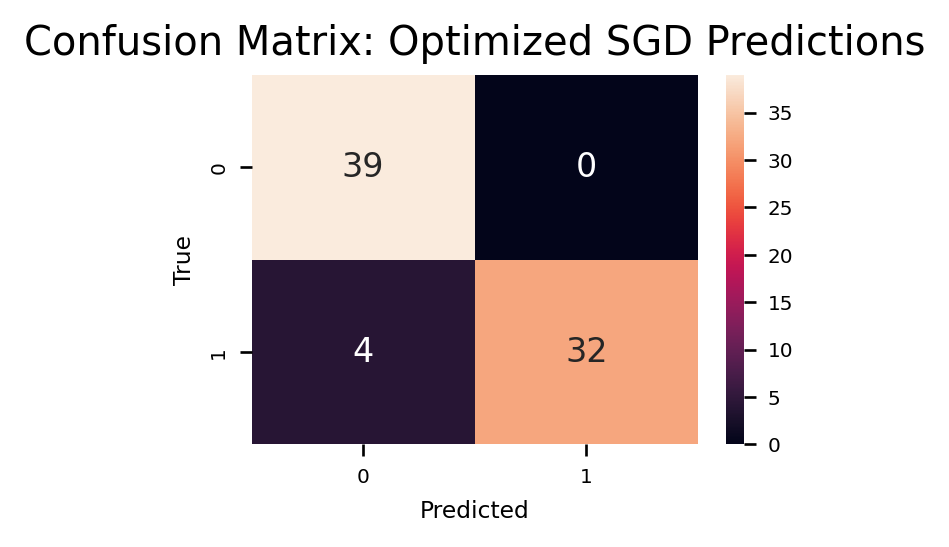

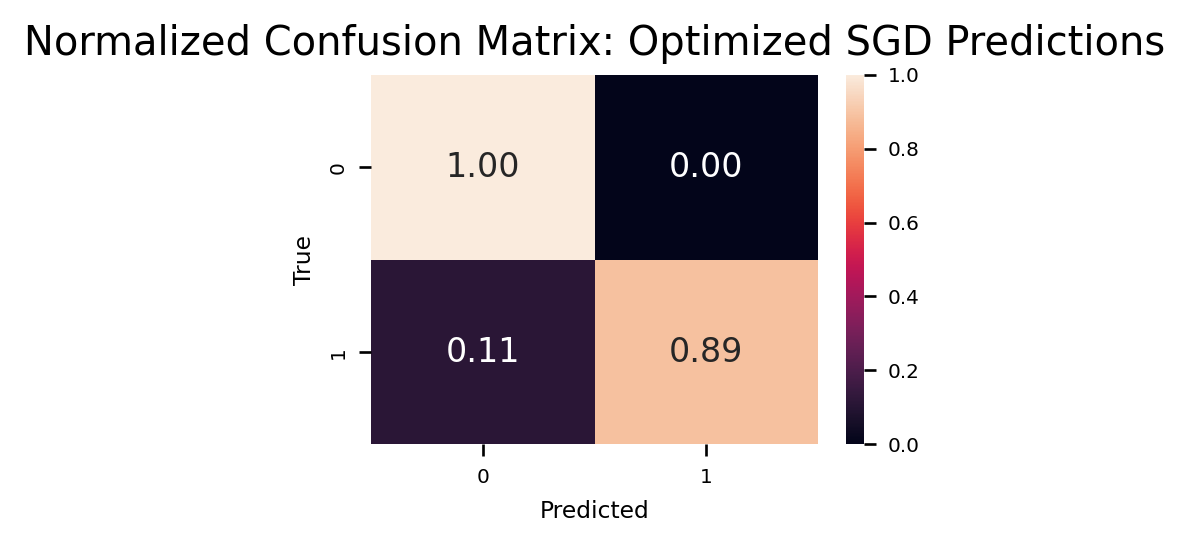

0.0

In [38]:
# Use the best estimator from GridSearchCV to make predictions on the test set
y_pred_sgd_opt = grid_search_sgd.best_estimator_.predict(X_test)

# Calculate metrics and plot confusion matrix
calculate_metrics_and_plot_cm(y_test, y_pred_sgd_opt, "Optimized SGD Predictions")

# Calculate the normalized confusion matrix for the optimized SGD classifier
cm_normalized_sgd_opt = confusion_matrix(y_test, y_pred_sgd_opt, normalize='true')

# Plot the normalized confusion matrix for the SGD classifier
plt.figure(figsize=(3,2))
sns.heatmap(cm_normalized_sgd_opt, annot=True, fmt='.2f')
plt.title("Normalized Confusion Matrix: Optimized SGD Predictions")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Calculate the probability that a healthy person (one with a benign tumor) is incorrectly labeled as having malignant cancer
prob_benign_malignant_sgd_opt = cm_normalized_sgd_opt[0, 1]

prob_benign_malignant_sgd_opt


In [25]:
# The top 3 classifiers are: SVM, KNN, and Decision Tree.
# The SVM and KNN have similar performance but SVM is superior.

### 2.7 Model selection [1 mark]

**Choose the best classifier** (as seen in workshops 3 to 6) and give details of your hyperparameter settings. **Explain the reason for your choice.**

In [26]:
# SVM classifier with 'rbf' kernel and C=1 is the best model for this problem.
# It correctly identifies all malignant cases (recall = 1.0) and has a high precision (0.98).
# Incorreclty labeled 1 in 39 healthy cases as malignant (precision = 0.97).
# And has the highest F1 score (0.99) and AUC (0.99) of all the models.

### 2.8 Final performance [1.5 marks]

**Calculate and display an unbiased performance measure that you can present to the client.**

**Is your chosen classifier underfitting or overfitting?**

**Does your chosen classifier meet the client's performance criteria?**

In [27]:
# Use cross_val_score to calculate the unbiased performance measure of the chosen model (SVM classifier)
from sklearn.model_selection import cross_val_score

final_model = SVC(C=1, kernel='rbf', random_state=42)

# Create the final feature set X and target variable y
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# Use cross_val_score to calculate the unbiased performance measure of the chosen model (SVM classifier)
unbiased_performance = cross_val_score(final_model, X, y, cv=10, scoring='balanced_accuracy').mean()

# Display the unbiased performance measure
unbiased_performance

0.9599107142857143

In [28]:
# The unbiased performance measure is 0.96 as evaluated by 10-fold cross-validation.
# This is a good estimate of the performance of the model on unseen data.
# Comparing the unbiased performance measure to the performance on the test set, 
# We can see that the model is not overfitting or underfitting the training data.
# We observe that the SVM classifier achieved a balanced accuracy of 0.96 on the training data and the same score on the test data.

## 3. Decision Boundaries (15% = 4.5 marks)

### 3.1 Rank features [1 mark]

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is (mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1))), where x1 and x2 are the datasets corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [29]:
data = pd.read_csv('assignment2.csv')


# Split the data into two groups
group1 = data[data['label'] == 'malignant']
group2 = data[data['label'] == 'benign']

# Remove the 'label' column
group1 = group1.drop(columns=['label'])
group2 = group2.drop(columns=['label'])

# Calculate the T-scores
t_scores = (group1.mean() - group2.mean()) / (0.5 * (group1.std() + group2.std()))

# Get the absolute T-scores
abs_t_scores = np.abs(t_scores)

# Sort the T-scores in descending order and get the top 4 features
top_features = abs_t_scores.sort_values(ascending=False)[:4]

top_features

worst concave points    2.487161
worst perimeter         2.473073
worst radius            2.410839
mean concave points     2.229436
dtype: float64

### 3.2 Visualise decision boundaries [2.5 marks]

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the DecisionBoundaryDisplay function (as per workshop 6).

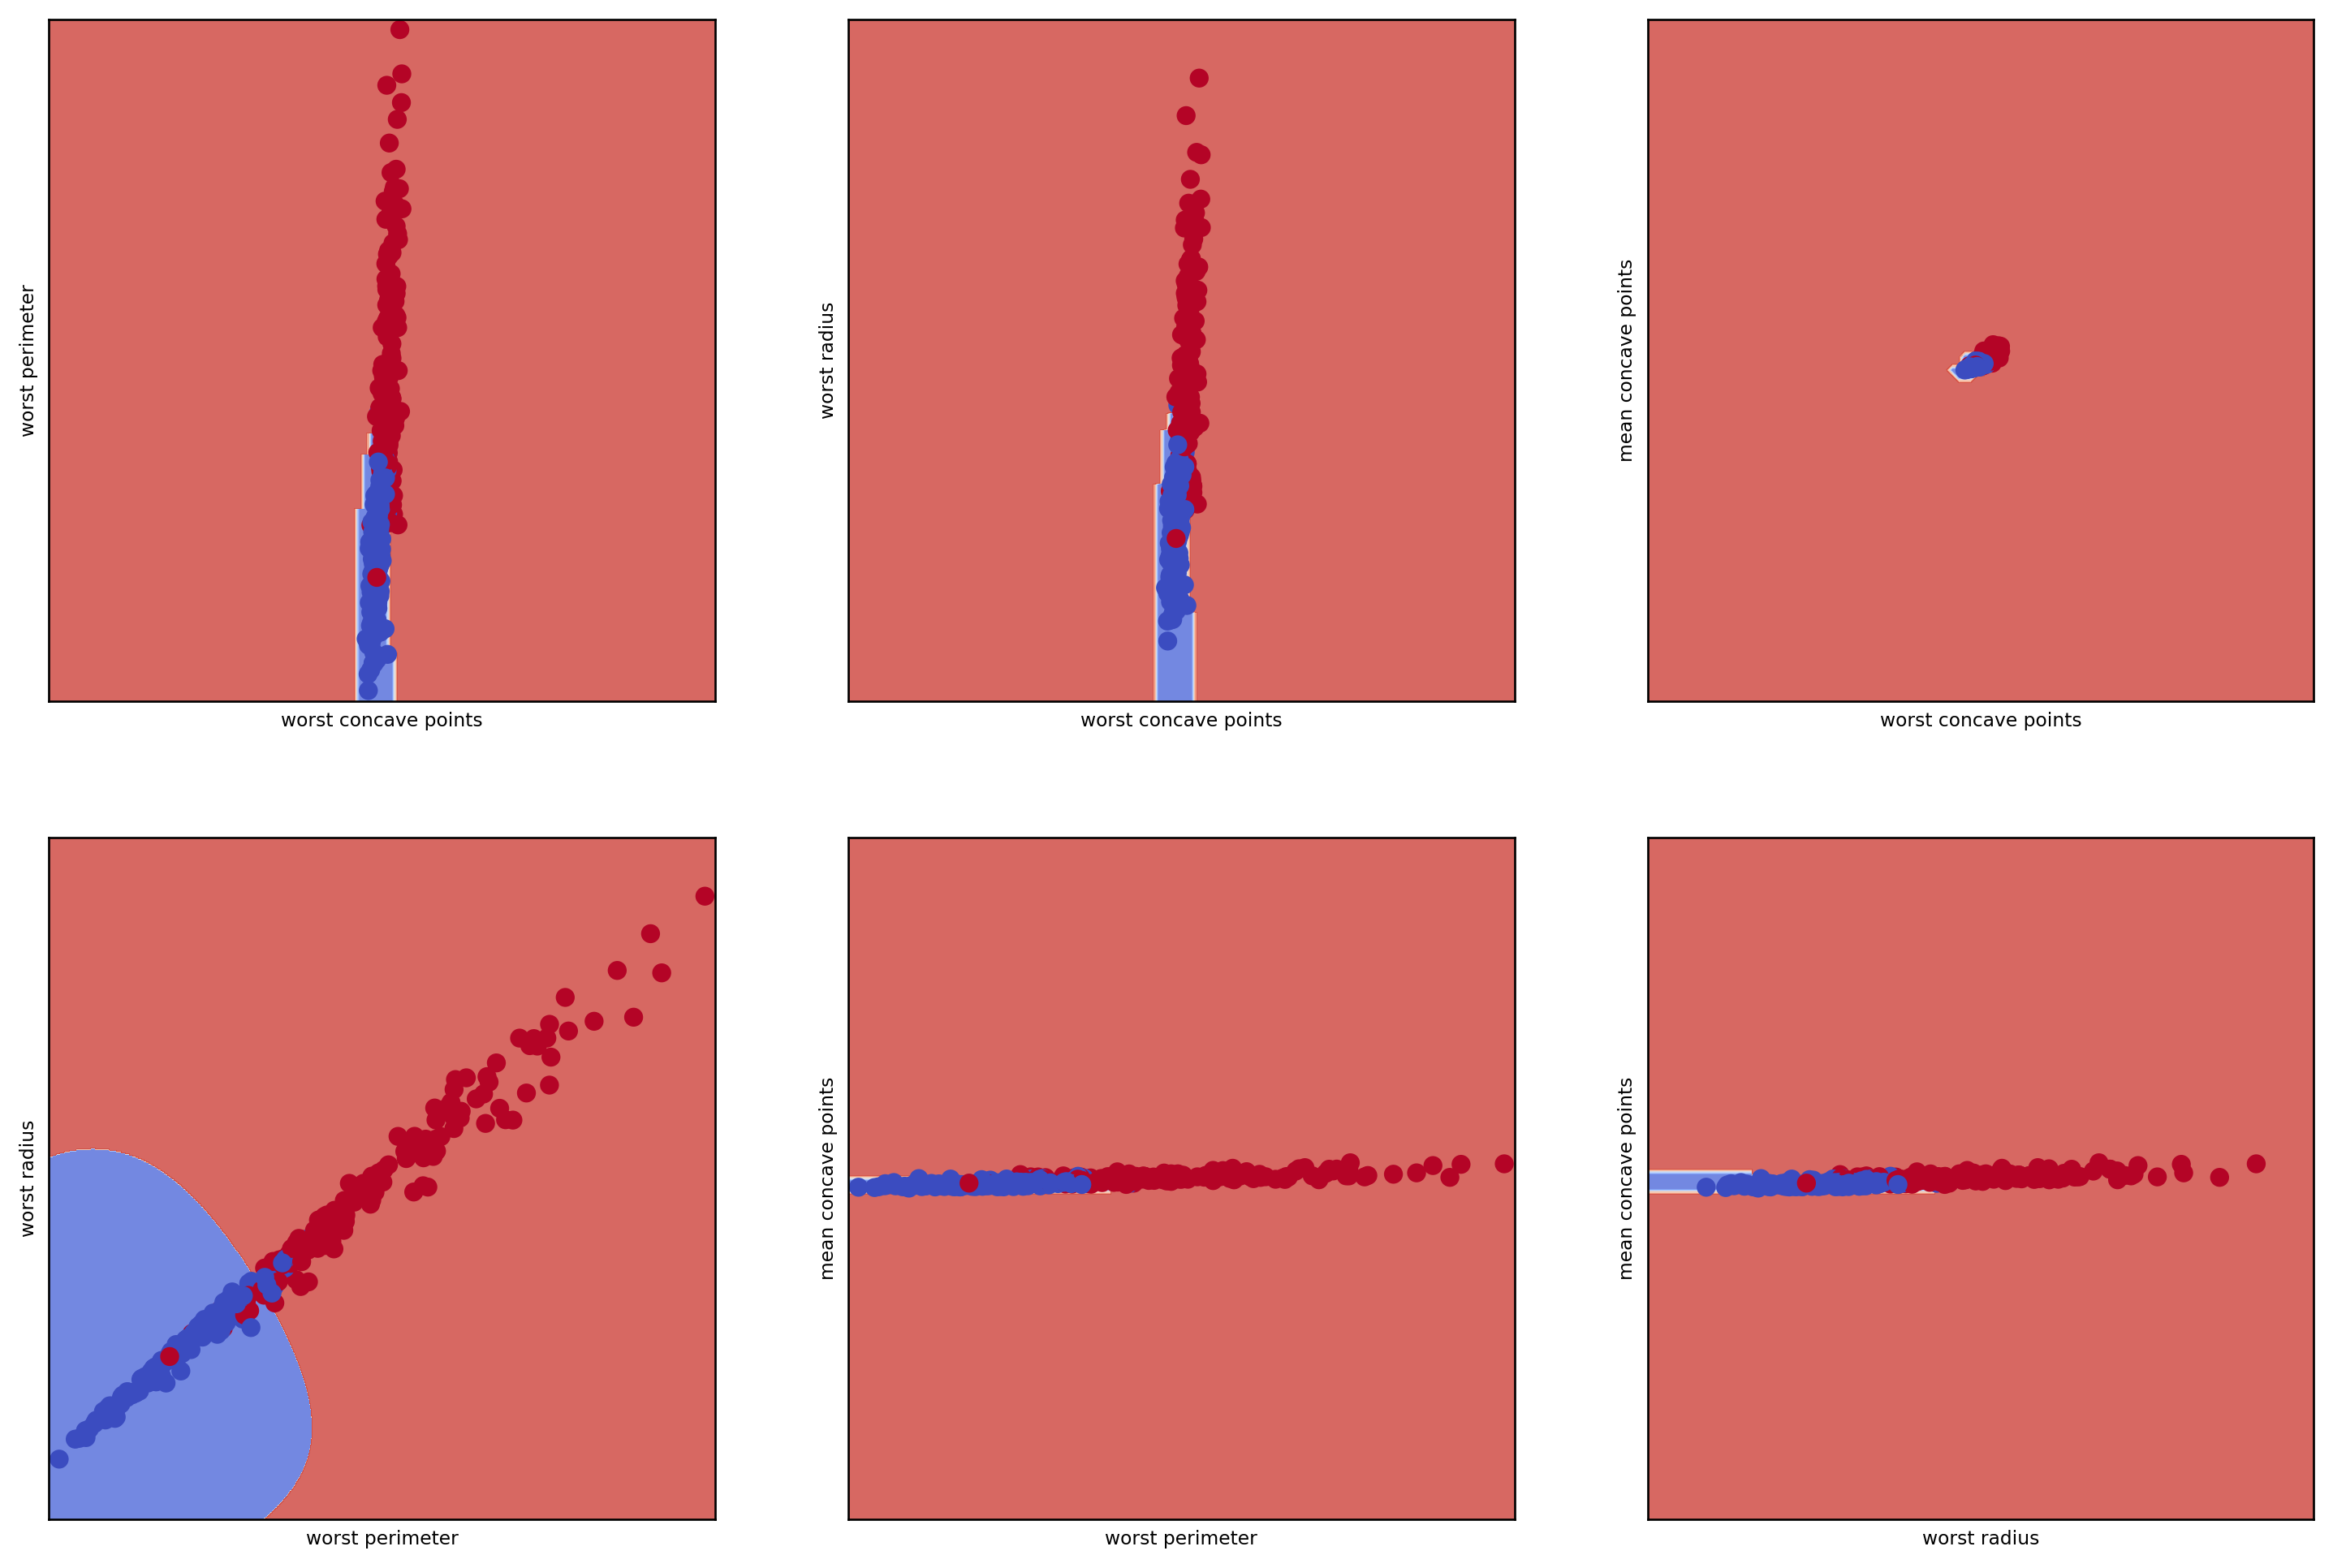

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

from sklearn import svm
from sklearn.datasets import make_blobs

# Define the classifier
clf = make_pipeline(StandardScaler(), SVC(C=1, kernel='rbf', random_state=42))

# Define the feature pairs
feature_pairs = [('worst concave points', 'worst perimeter'), 
                 ('worst concave points', 'worst radius'), 
                 ('worst concave points', 'mean concave points'), 
                 ('worst perimeter', 'worst radius'), 
                 ('worst perimeter', 'mean concave points'), 
                 ('worst radius', 'mean concave points')]

# Plot the decision boundaries for each pair of features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for (feature1, feature2), ax in zip(feature_pairs, axes.ravel()):
    X = df[[feature1, feature2]].to_numpy()
    y = df['label'].map({'benign': 0, 'malignant': 1}).to_numpy()
    
    clf.fit(X, y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


### 3.3 Interpretation [1 mark]

From the decision boundaries displayed above, **would you expect the method to extrapolate well or not**?  Give reasons for your answer.

In [31]:
# No I don't expect the model to extrapolate well to new data.
# The decisions bondaries are failry complex
# There are outliers that could potentially cause distortion
# In some plots areas of overlap are seen and may affect the classifiers ability to distinguish between the classes.

## 4. Second Round (15% = 4.5 marks)

After presenting your initial results to the client they come back to you and say that they have done some financial analysis and it would save them a lot of time and money if they did not have to analyse every cell, which is needed to get the "worst" features. Instead, they can quickly get accurate estimates for the "mean" and "standard error" features from a much smaller, randomly selected set of cells.

They ask you to **give them a performance estimate for the same problem, but without using any of the "worst" features.**



### 4.1 New estimate [3.5 marks]

**Calculate an unbiased performance estimate** for this new problem, as requested by the client.

In [32]:
from sklearn.metrics import roc_curve, auc

# Drop the "worst" features from the dataset
df_no_worst = df.drop(columns=df.columns[df.columns.str.startswith('worst')])

# Split the new dataset into training and testing sets
df_no_worst_train, df_no_worst_test = train_test_split(df_no_worst, test_size=0.25, random_state=42, stratify=df_no_worst['label'])

# Define the features and the target variable for the training set
X_train_no_worst = df_no_worst_train.drop(columns='label')
y_train_no_worst = df_no_worst_train['label']

# Define the features and the target variable for the testing set
X_test_no_worst = df_no_worst_test.drop(columns='label')
y_test_no_worst = df_no_worst_test['label']

# Create a new instance of the SVM classifier with the best hyperparameters identified earlier
best_clf_no_worst = make_pipeline(StandardScaler(), SVC(C=1, kernel='rbf', random_state=42))

# Fit the classifier to the training set without the "worst" features
best_clf_no_worst.fit(X_train_no_worst, y_train_no_worst)

# Predict the labels for the testing set
y_pred_no_worst = best_clf_no_worst.predict(X_test_no_worst)

# Balanced accuracy
balanced_accuracy_no_worst = balanced_accuracy_score(y_test_no_worst, y_pred_no_worst)

# Recall
recall_no_worst = recall_score(y_test_no_worst, y_pred_no_worst, pos_label='malignant')

# Precision
precision_no_worst = precision_score(y_test_no_worst, y_pred_no_worst, pos_label='malignant')

# AUC
fpr, tpr, _ = roc_curve(y_test_no_worst.map({'benign': 0, 'malignant': 1}), 
                         best_clf_no_worst.decision_function(X_test_no_worst))
auc_no_worst = auc(fpr, tpr)

# F1 score
f1score_no_worst = f1_score(y_test_no_worst, y_pred_no_worst, pos_label='malignant')

# F-beta score with beta = 0.1
fbeta01_no_worst = fbeta_score(y_test_no_worst, y_pred_no_worst, beta=0.1, pos_label='malignant')

# F-beta score with beta = 10
fbeta10_no_worst = fbeta_score(y_test_no_worst, y_pred_no_worst, beta=10, pos_label='malignant')

# Display the performance metrics
performance_metrics_no_worst = pd.Series({
    'Balanced accuracy': balanced_accuracy_no_worst,
    'Recall': recall_no_worst,
    'Precision': precision_no_worst,
    'AUC': auc_no_worst,
    'F1 score': f1score_no_worst,
    'F-beta score (beta=0.1)': fbeta01_no_worst,
    'F-beta score (beta=10)': fbeta10_no_worst
})

performance_metrics_no_worst


Balanced accuracy          0.946581
Recall                     0.944444
Precision                  0.944444
AUC                        0.992165
F1 score                   0.944444
F-beta score (beta=0.1)    0.944444
F-beta score (beta=10)     0.944444
dtype: float64

### 4.2 Performance difference [1 mark]

Do you think the new classifier, that does not use the "worst" features, is:
 - **as good as the previous classifier** (that uses all the features)
 - **better than the previous classifier**
 - **worse than the previous classifier**
 
Give reasons for your answer.

In [33]:
# The new model performs worse than the original model. all metrics are lower than the original model.
# However the metrics are all above 0.94 suggesting it still works and satifies the clients requirements.
# The "worst" seem to carry important information for the model to make accurate predictions.
# Removing the features negatively impacts the performance of the model.